## Model_Selection (Assignment)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
data = pd.read_csv('/Users/apple/Downloads/titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data preprocessing

In [7]:
df = data.drop('PassengerId',axis =1)

In [8]:
female = df.loc[df.Sex=='female']['Survived'] ##No. of females can be survived

In [9]:
female.head()

1    1
2    1
3    1
8    1
9    1
Name: Survived, dtype: int64

In [10]:
print('% of female survived is:',sum(female)/len(female))

% of female survived is: 0.7420382165605095


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.drop('Cabin',axis =1,inplace = True) 
##Since cabin column contains 70% nullvalues hence we drop the cabin column 

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

<Axes: >

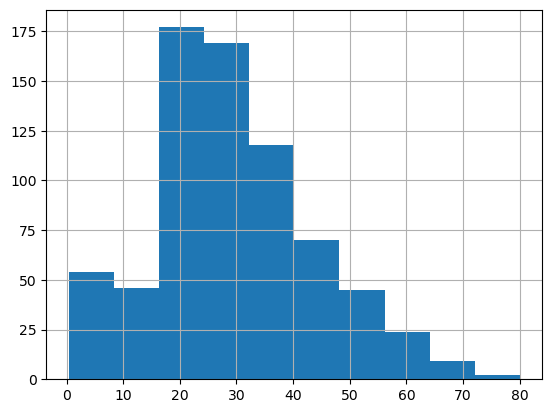

In [15]:
df['Age'].hist()

## We observed that age column in the datset has skewed and has outliers. so we fill null values as median in age column

In [16]:
df['Age'].median() ## to get median value in age column

28.0

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [19]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [22]:
df['Ticket'].nunique()

681

In [23]:
df['Name'].nunique()

891

In [24]:
df.drop(['Name','Ticket'],axis =1,inplace=True)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
##to label encode the embarked column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['Embarked']= le.fit_transform(df['Embarked'])

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Spliting data into features and targets

In [29]:
x = df.drop('Survived',axis =1)
y = df['Survived']

## Splitting training and testing data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Create KNN and SVM models

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
metric_k =[]
neighbors = np.arange(3,15)

In [33]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k,metric ='minkowski')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [34]:
metric_k

[0.7262569832402235,
 0.7206703910614525,
 0.7094972067039106,
 0.7318435754189944,
 0.7262569832402235,
 0.7150837988826816,
 0.7206703910614525,
 0.7150837988826816,
 0.7374301675977654,
 0.7150837988826816,
 0.7318435754189944,
 0.7262569832402235]

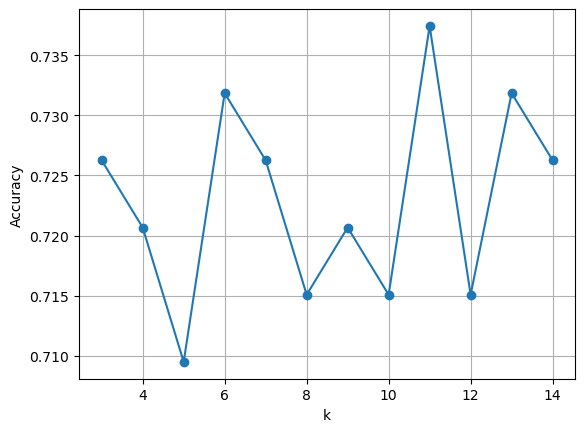

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [36]:
classifier = KNeighborsClassifier(n_neighbors =5,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions))
print('Recall = ',recall_score(y_test,y_predictions))
print('F1 score = ',f1_score(y_test,y_predictions))
confusion_matrix(y_test,y_predictions)

Accuracy =  0.7094972067039106
Precision =  0.6964285714285714
Recall =  0.527027027027027
F1 score =  0.5999999999999999


array([[88, 17],
       [35, 39]])

In [38]:
from sklearn.svm import SVC
svmc1f = SVC(kernel = 'linear')
svmc1f.fit(x_train,y_train)

SVC(kernel='linear')

In [39]:
y_pred = svmc1f.predict(x_test)

In [40]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is 0.7821229050279329
[[88 17]
 [22 52]]


## K Fold and stratified K Fold cross validation techniques. find the average accuracy score of the models

In [41]:
from sklearn.model_selection import KFold

In [42]:
knn_model = KNeighborsClassifier(n_neighbors=3)  # Adjust the hyperparameters
svm_model = SVC(kernel='linear')  # Adjust the kernel and other hyperparameters

In [43]:
knn_classifier = knn_model.fit(x_train,y_train)
kcf_score= knn_classifier.score(x_test,y_test)
kcf_score

0.7262569832402235

In [44]:
svm = svm_model.fit(x_train,y_train)
svm_score = svm.score(x_test,y_test)
svm_score

0.7821229050279329

In [45]:
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [46]:
from sklearn.model_selection import cross_val_score
cv_result_knn = cross_val_score(knn_classifier,x,y,cv = kfold_validator)

In [47]:
cv_result_knn

array([0.65555556, 0.69662921, 0.69662921, 0.70786517, 0.76404494,
       0.73033708, 0.73033708, 0.70786517, 0.69662921, 0.79775281])

In [48]:
print('Kfold Crossvalidation mean score for knn model:',np.mean(cv_result_knn))

Kfold Crossvalidation mean score for knn model: 0.7183645443196005


In [49]:
cv_result_svm = cross_val_score(svm,x,y,cv = kfold_validator)

In [50]:
cv_result_svm

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [51]:
print('Kfold crossvalidation mean score for svm model:',np.mean(cv_result_svm))

Kfold crossvalidation mean score for svm model: 0.786729088639201


In [52]:
 ##Stratified cross validation
from sklearn.model_selection import StratifiedKFold
skfold_validator =  StratifiedKFold(n_splits = 10)

In [53]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [54]:
cv_result_knnsk = cross_val_score(knn_classifier,x,y,cv = skfold_validator)
cv_result_svmsk = cross_val_score(svm,x,y,cv = skfold_validator)

In [55]:
print('Stratified kfold cross validation for knn_model: ',cv_result_knnsk)
print('Stratified kfold cross validation for svm_model: ',cv_result_svmsk)

Stratified kfold cross validation for knn_model:  [0.66666667 0.6741573  0.69662921 0.73033708 0.7752809  0.73033708
 0.7752809  0.73033708 0.65168539 0.78651685]
Stratified kfold cross validation for svm_model:  [0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]


In [56]:
print('Stratified kfold cross validation average score for knn_model: ',np.mean(cv_result_knnsk))
print('Stratified kfold cross validation average score for svm_model: ',np.mean(cv_result_svmsk))

Stratified kfold cross validation average score for knn_model:  0.7217228464419476
Stratified kfold cross validation average score for svm_model:  0.786729088639201
